In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns
import warnings
from IPython import display
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from dython.nominal import associations
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
%matplotlib inline

In [106]:
df = pd.read_csv('corona_tested_individuals_ver_006.english.csv')

In [107]:
df.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [108]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other


In [109]:
print(df[df.head_ache == 'None'].count()/ len(df))
print(df[df.corona_result == 'None'].count()/ len(df))
print( df[df.age_60_and_above == 'None'].count()/ len(df))
print(df[df.test_indication == 'None'].count()/ len(df))
print(df[df.cough == 'None'].count()/ len(df))

test_date              0.000004
cough                  0.000004
fever                  0.000004
sore_throat            0.000004
shortness_of_breath    0.000004
head_ache              0.000004
corona_result          0.000004
age_60_and_above       0.000004
gender                 0.000004
test_indication        0.000004
dtype: float64
test_date              0.0
cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          0.0
age_60_and_above       0.0
gender                 0.0
test_indication        0.0
dtype: float64
test_date              0.456593
cough                  0.456593
fever                  0.456593
sore_throat            0.456593
shortness_of_breath    0.456593
head_ache              0.456593
corona_result          0.456593
age_60_and_above       0.456593
gender                 0.456593
test_indication        0.456593
dtype: float64
test_date              0.0
cough             

In [110]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


# we can see already that's the type in each column is an object and that may cause some problems

Text(0.5, 1.0, 'The Count in the column Fever')

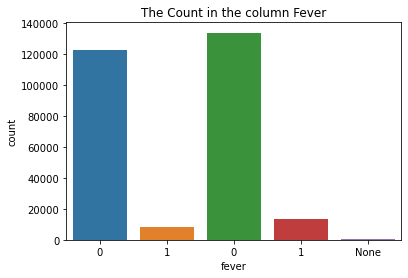

In [112]:
sns.countplot(df['fever'])
plt.title("The Count in the column Fever")

# There's two types of ones and two types of zeros!

# We can see it's biased we have a huge margin between the one and the zero

Text(0.5, 1.0, 'The Count in the column sore throat')

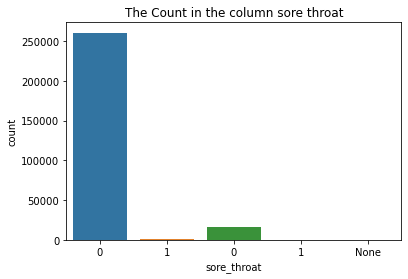

In [113]:
sns.countplot(df['sore_throat'])
plt.title("The Count in the column sore throat")

# We can see clearly that it is biased  and there is two types of ones and zeros 

In [114]:
list(df.sore_throat).count('None')

1

# We can see that we have one None in the column sore_throat

In [115]:
list(df.sore_throat).count('1')

446

Text(0.5, 1.0, ' Count in the column shortness of breath')

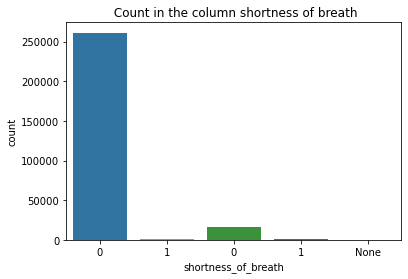

In [116]:
sns.countplot(df['shortness_of_breath'])
plt.title(" Count in the column shortness of breath")

# We can see clearly that it is biased  and there is two types of ones and zeros 

Text(0.5, 1.0, 'Count in column Head Ache')

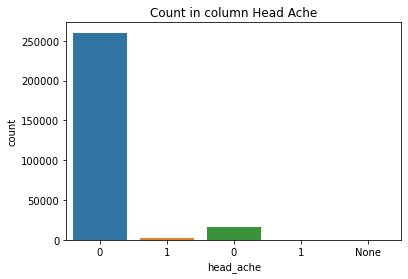

In [117]:
sns.countplot(df['head_ache'])
plt.title("Count in column Head Ache")

In [118]:
df = df[df.corona_result != 'other']

# We can see clearly that it is biased   and there is two types of ones and zeros 

Text(0.5, 1.0, 'Count in corona result')

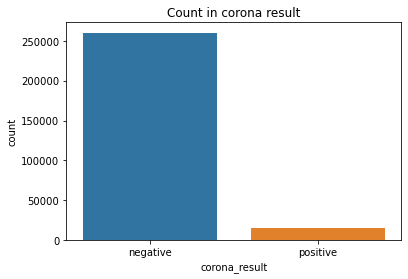

In [119]:
sns.countplot(df['corona_result'])
plt.title("Count in corona result")

# We can see we have "other" this can be classified as missing values? and we can see it's an imbalanced 

Text(0.5, 1.0, ' Count in age 60 and above ')

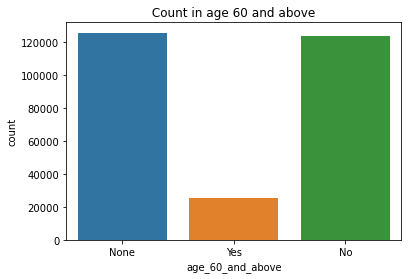

In [120]:
sns.countplot(df['age_60_and_above'])
plt.title(" Count in age 60 and above ")

Text(0.5, 1.0, 'Count in column gender')

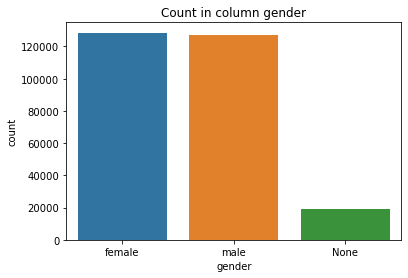

In [121]:
sns.countplot(df['gender'])
plt.title("Count in column gender")

# Perfect Distribution

Text(0.5, 1.0, 'Count in test indication')

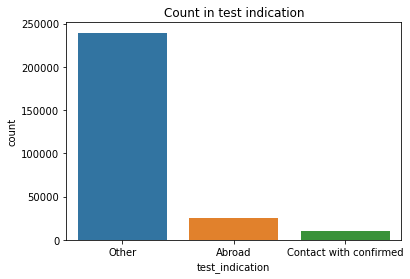

In [122]:
sns.countplot(df['test_indication'])
plt.title("Count in test indication")

# you can see clearly that the dataset is imbalanced 

# We might approach the unbalanced dataset in a variety of ways, but we choose to tackle the problem by undersampling the majority class



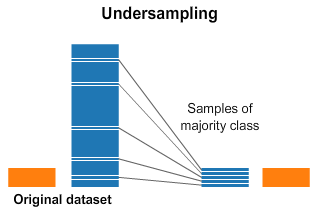

In [5]:
display.Image("under sampling of the  majority class.PNG")

# First we drop the date column 

In [125]:
df.drop("test_date", axis=1, inplace=True)


In [126]:
df


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...
278842,0,0,0,0,0,negative,None,None,Other
278843,0,0,0,0,0,negative,None,None,Other
278844,0,0,0,0,0,negative,None,None,Other
278845,0,0,0,0,0,positive,None,None,Contact with confirmed


In [127]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...
278842,0,0,0,0,0,negative,None,None,Other
278843,0,0,0,0,0,negative,None,None,Other
278844,0,0,0,0,0,negative,None,None,Other
278845,0,0,0,0,0,positive,None,None,Contact with confirmed


In [128]:
print(df[df.head_ache == 'None'].count()/ len(df))
print(df[df.corona_result == 'other'].count()/ len(df))
print( df[df.age_60_and_above == 'None'].count()/ len(df))
print(df[df.test_indication == 'Other'].count()/ len(df))
print(df[df.cough == 'None'].count()/ len(df))


cough                  0.000004
fever                  0.000004
sore_throat            0.000004
shortness_of_breath    0.000004
head_ache              0.000004
corona_result          0.000004
age_60_and_above       0.000004
gender                 0.000004
test_indication        0.000004
dtype: float64
cough                  0.0
fever                  0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
corona_result          0.0
age_60_and_above       0.0
gender                 0.0
test_indication        0.0
dtype: float64
cough                  0.457033
fever                  0.457033
sore_throat            0.457033
shortness_of_breath    0.457033
head_ache              0.457033
corona_result          0.457033
age_60_and_above       0.457033
gender                 0.457033
test_indication        0.457033
dtype: float64
cough                  0.870699
fever                  0.870699
sore_throat            0.870699
shortness_of_breath    0.870699
head_ach

# The missing values are insignificant. The only two column with a large number of missing values are 'age 60 and above'which has 45.7% . We chose to remove it due to the high number of missing values. we will not delete the 'test indication' column although it had a large number of missing values classify  as 'other' ,  being in contact with confirmed or coming from another country as abroad seems to be what is the most important features and this type of datasets

In [129]:
df = df.drop(['age_60_and_above'] , axis =1 )

## The rest of the missing values are insignificant (less than 1%) we decided to drop them

In [130]:

df = df[df.head_ache != 'None']
df = df[df.corona_result != 'other']
df = df[df.cough != 'None']



# Now We Fix the Types in The DF 

In [131]:
df['cough'] = df['cough'].astype(float) 
df['sore_throat'] = df['sore_throat'].astype(float) 
df['shortness_of_breath'] = df['shortness_of_breath'].astype(float) 
df['head_ache'] = df['head_ache'].astype(float) 
df['shortness_of_breath'] = df['shortness_of_breath'].astype(float)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274704 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                274704 non-null  float64
 1   fever                274704 non-null  object 
 2   sore_throat          274704 non-null  float64
 3   shortness_of_breath  274704 non-null  float64
 4   head_ache            274704 non-null  float64
 5   corona_result        274704 non-null  object 
 6   gender               274704 non-null  object 
 7   test_indication      274704 non-null  object 
dtypes: float64(4), object(4)
memory usage: 18.9+ MB


In [133]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
0,0.0,0,0.0,0.0,0.0,negative,female,Other
1,1.0,0,0.0,0.0,0.0,negative,female,Other
2,0.0,1,0.0,0.0,0.0,negative,male,Other
3,1.0,0,0.0,0.0,0.0,negative,female,Other
4,1.0,0,0.0,0.0,0.0,negative,male,Other
...,...,...,...,...,...,...,...,...
278842,0.0,0,0.0,0.0,0.0,negative,None,Other
278843,0.0,0,0.0,0.0,0.0,negative,None,Other
278844,0.0,0,0.0,0.0,0.0,negative,None,Other
278845,0.0,0,0.0,0.0,0.0,positive,None,Contact with confirmed


## We will perform one-hot encoding to convert categorical features to numerical features Using get dummies from the pandas library,   We chose one hot encoding specifically because we don't want the model to assume that there is any ordering in features such as 'gender' or 'test indication'.

### For example, if we use labelencoder, it will give a specific class the number 0 and another class the number 1, and the third class will get the number 2, as a result, the model will make some assumptions.

In [134]:

df = pd.get_dummies(df, columns=['gender'], drop_first=True, prefix='Gender')


df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication,Gender_female,Gender_male
0,0.0,0,0.0,0.0,0.0,negative,Other,1,0
1,1.0,0,0.0,0.0,0.0,negative,Other,1,0
2,0.0,1,0.0,0.0,0.0,negative,Other,0,1
3,1.0,0,0.0,0.0,0.0,negative,Other,1,0
4,1.0,0,0.0,0.0,0.0,negative,Other,0,1


#  UnderSampling of the majority class method

In [135]:
# split all possible outcomes of the target feature

class_negative =  df[df['corona_result']== 'negative']
class_positive =  df[df['corona_result']== 'positive']

Text(0.5, 1.0, 'Count in the corona result')

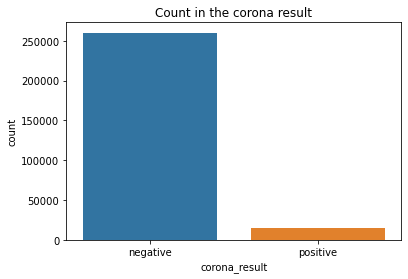

In [136]:
sns.countplot(df['corona_result'])
plt.title("Count in the corona result")

In [137]:
# specify the length of each possible outcome of the target feature

class_negative_len = len(class_negative)
class_positive_len = len(class_positive)

# Checking The Shape

In [138]:
class_negative.shape

(260008, 9)

In [139]:
class_positive.shape

(14696, 9)

# We Will use the sample function in pandas by specifying a number and it will selects random rows out of the DF

In [140]:
class_negative = class_negative.sample(14696)#7146

In [141]:
df_underS = pd.concat([class_negative ,class_positive],axis=0 )

In [142]:
df_underS

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,test_indication,Gender_female,Gender_male
78241,0.0,0,0.0,0.0,0.0,negative,Other,1,0
166338,0.0,0,0.0,0.0,0.0,negative,Other,0,1
107447,0.0,0,0.0,0.0,0.0,negative,Other,1,0
91901,0.0,0,0.0,0.0,0.0,negative,Other,1,0
113413,0.0,0,0.0,0.0,0.0,negative,Other,1,0
...,...,...,...,...,...,...,...,...,...
278833,0.0,1,1.0,0.0,0.0,positive,Abroad,0,0
278834,1.0,0,1.0,0.0,1.0,positive,Abroad,0,0
278836,0.0,0,0.0,0.0,0.0,positive,Contact with confirmed,0,0
278839,0.0,0,1.0,0.0,0.0,positive,Abroad,0,0


Text(0.5, 1.0, 'Count in the corona result')

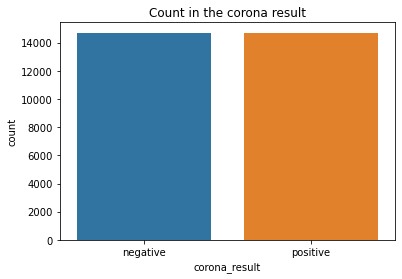

In [77]:
sns.countplot(df_underS['corona_result'])
plt.title("Count in the corona result")

# Each type now has the same amount of rows

In [143]:
df_underS = pd.get_dummies(df_underS, columns=['corona_result'], drop_first=True, prefix='TR')
df_underS = pd.get_dummies(df_underS, columns=['test_indication'], drop_first=True, prefix='TI')


df_underS.head()



,cough,fever,sore_throat,shortness_of_breath,head_ache,Gender_female,Gender_male,TR_positive,TI_Contact with confirmed,TI_Other
78241,0.0,0,0.0,0.0,0.0,1,0,0,0,1
166338,0.0,0,0.0,0.0,0.0,0,1,0,0,1
107447,0.0,0,0.0,0.0,0.0,1,0,0,0,1
91901,0.0,0,0.0,0.0,0.0,1,0,0,0,1
113413,0.0,0,0.0,0.0,0.0,1,0,0,0,1


## Because we convert the df to numbers, if the patient is male, it will be one and if the patient is female, it will be zero, thus we must remove the gender female because it is redundant information that may impact the model.

In [144]:
df_underS = df_underS.drop(['Gender_female'] , axis =1 )


<AxesSubplot:>

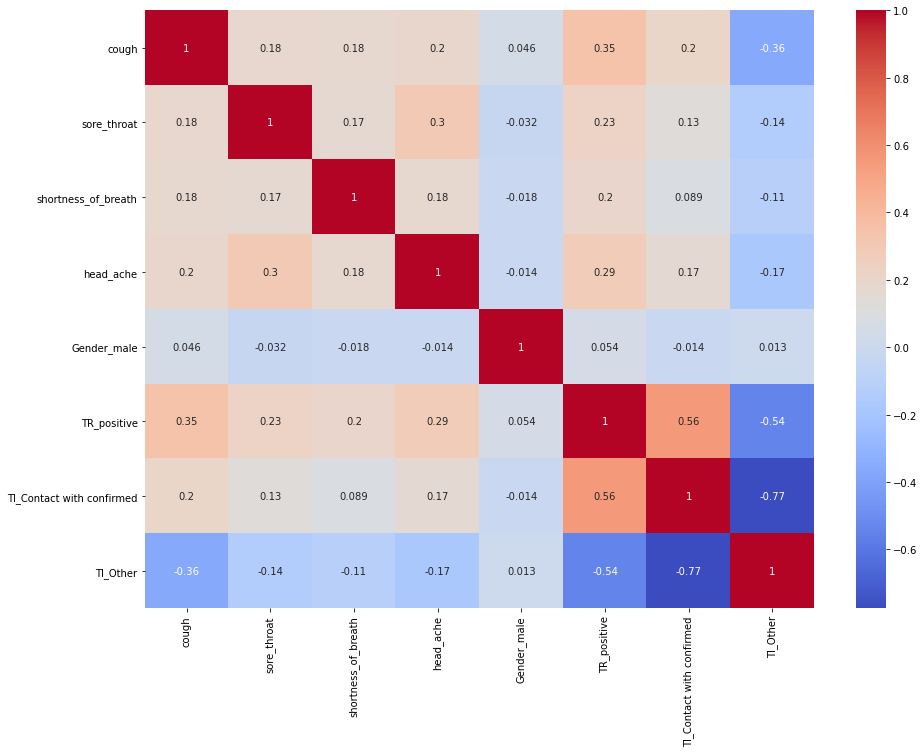

In [145]:

corr = df_underS.corr()
plt.figure(figsize=(15,11))
sns.heatmap(corr,annot=True , cmap='coolwarm')


## There is indeed a strong correlation between the target variable and confirmed contact or any feature derived from the test indication.

## We can see that gender made no difference at all, therefore we decided to drop the gender column.

In [146]:

df_underS = df_underS[df.head_ache != 'None']
df_underS = df_underS[df.corona_result != 'other']
df_underS = df_underS[df.corona_result != 'None']
df_underS = df_underS[df.cough != 'None']
df_underS = df_underS[df.fever != 'None']
df_underS = df_underS[df.shortness_of_breath != 'None']

In [147]:
x = df_underS.drop(columns=['TR_positive'], axis=1) 
y = df_underS['TR_positive']

In [148]:

df_underS

,cough,fever,sore_throat,shortness_of_breath,head_ache,Gender_male,TR_positive,TI_Contact with confirmed,TI_Other
78241,0.0,0,0.0,0.0,0.0,0,0,0,1
166338,0.0,0,0.0,0.0,0.0,1,0,0,1
107447,0.0,0,0.0,0.0,0.0,0,0,0,1
91901,0.0,0,0.0,0.0,0.0,0,0,0,1
113413,0.0,0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
278833,0.0,1,1.0,0.0,0.0,0,1,0,0
278834,1.0,0,1.0,0.0,1.0,0,1,0,0
278836,0.0,0,0.0,0.0,0.0,0,1,1,0
278839,0.0,0,1.0,0.0,0.0,0,1,0,0


In [149]:
# Specify the hyperparameter 
parameters = {'SVM__C': [1, 10, 100],#3
              'SVM__gamma': [0.1, 0.01],#2
              'SVM__kernel': ['rbf']}#1

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21 , stratify =y)

### stratify = y is a Function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [84]:
# Setup the pipeline
steps = [('imputation', SimpleImputer(missing_values='None',strategy='most_frequent', add_indicator=True)),
         ('SVM', SVC())]

In [85]:
# instantiate the pipeline
pipeline = Pipeline(steps)

In [86]:
# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)

In [87]:
# Fit to the training set
cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('imputation',
                                        SimpleImputer(add_indicator=True,
                                                      missing_values='None',
                                                      strategy='most_frequent')),
                                       ('SVM', SVC())]),
             param_grid={'SVM__C': [1, 10, 100], 'SVM__gamma': [0.1, 0.01],
                         'SVM__kernel': ['rbf']})

In [88]:
y_pred = cv.predict(X_test)


In [89]:
confusion_matrix(y_test, y_pred)

array([[2576,  363],
       [ 556, 2384]], dtype=int64)

In [90]:
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))#85 84 84

Accuracy: 0.8436808981119238
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2939
           1       0.87      0.81      0.84      2940

    accuracy                           0.84      5879
   macro avg       0.85      0.84      0.84      5879
weighted avg       0.85      0.84      0.84      5879

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}


In [91]:
# Calculating the specificity
from sklearn.metrics import confusion_matrix

cm1= confusion_matrix(y_test, y_pred)
total1=sum(sum(cm1))


specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)# 78

Specificity :  0.8108843537414966


In [92]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective='binary:logistic' , n_estimators=10 , seed=123)

In [93]:
xgb_model = xgb.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')
hr_pred = xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())
print(classification_report(y_test, hr_pred))

[23:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "metric", "nrounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2939
           1       0.90      0.76      0.82      2940

    accuracy                           0.84      5879
   macro avg       0.84      0.84      0.83   

In [94]:
df_underS

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,TR_positive,TI_Contact with confirmed,TI_Other
160786,2020-04-08,0.0,0,0.0,0.0,0.0,No,None,0,0,1
9491,2020-04-29,0.0,0,0.0,0.0,0.0,None,female,0,0,1
115997,2020-04-15,0.0,0,0.0,0.0,0.0,None,female,0,0,1
111439,2020-04-16,0.0,0,0.0,0.0,0.0,None,female,0,0,1
106201,2020-04-17,0.0,0,0.0,0.0,0.0,None,female,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
278833,2020-03-11,0.0,1,1.0,0.0,0.0,None,None,1,0,0
278834,2020-03-11,1.0,0,1.0,0.0,1.0,None,None,1,0,0
278836,2020-03-11,0.0,0,0.0,0.0,0.0,None,None,1,1,0
278839,2020-03-11,0.0,0,1.0,0.0,0.0,None,None,1,0,0


In [161]:
from sklearn.ensemble import RandomForestClassifier


parameters = {'RandomForest__criterion':['gini', 'entropy'],
              'RandomForest__max_features':['auto', 'sqrt', 'log2'],
              'RandomForest__class_weight':['balanced', 'balanced_subsample'],
              'RandomForest__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             
             
             }

# 
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('RandomForest', RandomForestClassifier())]


# instantiate the pipeline
pipeline = Pipeline(steps)

# instantiate the GridSeachCV
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit to the training set
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))



Accuracy: 0.8511398434841783
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2939
           1       0.90      0.79      0.84      2939

    accuracy                           0.85      5878
   macro avg       0.86      0.85      0.85      5878
weighted avg       0.86      0.85      0.85      5878

Tuned Model Parameters: {'RandomForest__class_weight': 'balanced', 'RandomForest__criterion': 'entropy', 'RandomForest__max_depth': 80, 'RandomForest__max_features': 'sqrt'}


In [160]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier()   

clf_model.fit(X_train,y_train)





y_pred = clf_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(clf_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.8276624702279687
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2939
           1       0.90      0.79      0.84      2939

    accuracy                           0.85      5878
   macro avg       0.86      0.85      0.85      5878
weighted avg       0.86      0.85      0.85      5878



In [154]:
X_train

,cough,fever,sore_throat,shortness_of_breath,head_ache,Gender_male,TI_Contact with confirmed,TI_Other
244417,1.0,0,0.0,0.0,0.0,1,1,0
151103,1.0,1,0.0,0.0,0.0,0,1,0
169308,0.0,1,0.0,0.0,0.0,1,0,0
128438,0.0,0,0.0,0.0,0.0,0,0,1
223513,1.0,1,1.0,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...
97927,0.0,0,0.0,0.0,0.0,1,0,1
238631,0.0,0,0.0,0.0,0.0,1,0,1
154617,0.0,1,0.0,0.0,0.0,1,1,0
120884,0.0,0,0.0,0.0,0.0,1,0,1


In [155]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train,y_train)


y_pred = knn_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(knn_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy: 0.8276624702279687
              precision    recall  f1-score   support

           0       0.77      0.94      0.84      2939
           1       0.92      0.72      0.81      2939

    accuracy                           0.83      5878
   macro avg       0.84      0.83      0.83      5878
weighted avg       0.84      0.83      0.83      5878



In [156]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   

DT_model.fit(X_train,y_train)





y_pred = clf_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(DT_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy: 0.8276624702279687
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      2939
           1       0.84      0.79      0.82      2939

    accuracy                           0.82      5878
   macro avg       0.82      0.82      0.82      5878
weighted avg       0.82      0.82      0.82      5878



In [158]:
from sklearn.naive_bayes import GaussianNB





NB_model = GaussianNB()

NB_model.fit(X_train,y_train)


y_pred = knn_model.predict(X_test)

confusion_matrix(y_test, y_pred)

print("Accuracy: {}".format(NB_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy: 0.8276624702279687
              precision    recall  f1-score   support

           0       0.77      0.94      0.84      2939
           1       0.92      0.72      0.81      2939

    accuracy                           0.83      5878
   macro avg       0.84      0.83      0.83      5878
weighted avg       0.84      0.83      0.83      5878

